<a href="https://colab.research.google.com/github/MoizAhmed2517/Deep_Learning_Projects/blob/main/Food_vision_Using_FineTuning_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Remaking our Food Vision App using Fine Tuning Transfer Learning

In [1]:
!wget https://raw.githubusercontent.com/MoizAhmed2517/Deep_Learning_Projects/main/helper_function.py

--2022-12-03 16:27:45--  https://raw.githubusercontent.com/MoizAhmed2517/Deep_Learning_Projects/main/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10169 (9.9K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]   9.93K  --.-KB/s    in 0s      

2022-12-03 16:27:45 (70.4 MB/s) - ‘helper_function.py’ saved [10169/10169]



In [2]:
#Importing all helper function from Github that made in previous notebooks
from helper_function import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import zipfile
import os
import pathlib
import tensorflow as tf
import random

In [3]:
# Using tf.keras.applications (Pretrained models) for training our dataset

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-12-03 16:27:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.1MB/s    in 8.9s    

2022-12-03 16:28:02 (18.0 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
unzip_data("10_food_classes_10_percent.zip")

In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [19]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [20]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                  image_size=IMG_SIZE,
                                                                  label_mode="categorical",
                                                                  batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE) 

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="Input_Layer")
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
output = tf.keras.layers.Dense(10, activation="softmax", name="Output_Layer")(x)
model_0 = tf.keras.Model(inputs, output)

16705208/16705208 [==============================] - 1s 0us/step


In [10]:
model_0.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history_0 = model_0.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=len(test_data),
          callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="Feature_Extraction" )])

Saving TensorBoard log files to: transfer_learning/Feature_Extraction/20221203-143031
Epoch 1/5
24/24 [==============================] - 23s 412ms/step - loss: 1.8804 - accuracy: 0.4013 - val_loss: 1.3224 - val_accuracy: 0.7328
Epoch 2/5
24/24 [==============================] - 8s 324ms/step - loss: 1.1055 - accuracy: 0.7787 - val_loss: 0.8700 - val_accuracy: 0.8304
Epoch 3/5
24/24 [==============================] - 8s 326ms/step - loss: 0.7826 - accuracy: 0.8547 - val_loss: 0.6996 - val_accuracy: 0.8500
Epoch 4/5
24/24 [==============================] - 8s 327ms/step - loss: 0.6284 - accuracy: 0.8680 - val_loss: 0.6085 - val_accuracy: 0.8560
Epoch 5/5
24/24 [==============================] - 8s 331ms/step - loss: 0.5390 - accuracy: 0.8813 - val_loss: 0.5531 - val_accuracy: 0.8636


In [11]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 tf.math.truediv
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [12]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 Output_Layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [13]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

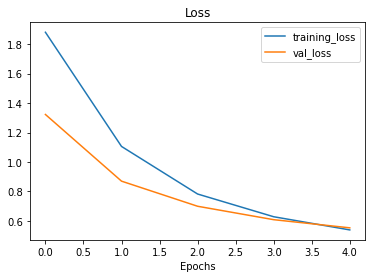

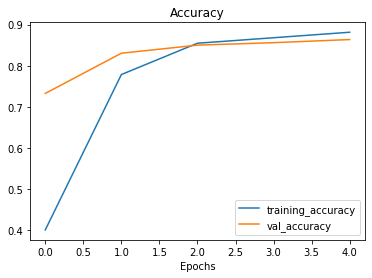

In [14]:
plot_loss_curves(history_0)

# Getting Feature vector from out trained model

In [15]:
input_shape = (1,4,4,3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor} \n")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 



In [16]:
GAPT = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"Feature output tensor:\n {GAPT} \n")

Feature output tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]] 



In [17]:
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [18]:
GMPT = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
GMPT

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

## Performing some experiment with Fine tuning transfer learning

### Model#1: Using feature extraction transfer learning with 1% of the training data with data Augmentation

In [19]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2022-12-03 14:31:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  38.6MB/s    in 3.6s    

2022-12-03 14:31:39 (35.2 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [20]:
unzip_data("10_food_classes_1_percent.zip")

In [21]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There a

In [22]:
train_dir = '10_food_classes_1_percent/train' 
test_dir = '10_food_classes_1_percent/test'

In [23]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [24]:
data_augment = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2)
    # tf.keras.layers.Rescale(1./255) Efficient net has this data augmentation layer for other models like RESNETV2 may be we need.
], name="data_augmentation")

In [25]:
data_augment

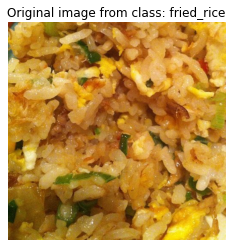

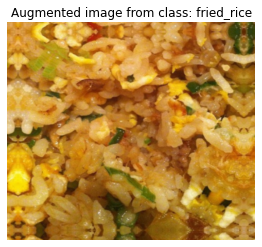

In [26]:
target_class = random.choice(train_data.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
rand_img = random.choice(os.listdir(target_dir))
rand_img_path = target_dir + "/" + rand_img

img = mpimg.imread(rand_img_path)
plt.imshow(img)
plt.title(f"Original image from class: {target_class}")
plt.axis(False);

# PLotting our augmented image

aug_img = data_augment(tf.expand_dims(img, 0), tf.float32)
plt.figure()
plt.title(f"Augmented image from class: {target_class}")
plt.imshow(tf.squeeze(aug_img)/255.)
plt.axis(False);

In [29]:
model_1_base = tf.keras.applications.EfficientNetB0(include_top=False)
input_shape = (224, 224, 3)

model_1_base.trainable = False
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
x = data_augment(inputs)
x = model_1_base(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="GAPT")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                   experiment_name="1PerDataAug")])

Saving TensorBoard log files to: transfer_learning/1PerDataAug/20221203-143307
Epoch 1/5
3/3 [==============================] - 10s 2s/step - loss: 2.4002 - accuracy: 0.0429 - val_loss: 2.2506 - val_accuracy: 0.1332
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.0892 - accuracy: 0.2286 - val_loss: 2.1177 - val_accuracy: 0.2368
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.8675 - accuracy: 0.4286 - val_loss: 1.9961 - val_accuracy: 0.3454
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.7010 - accuracy: 0.5000 - val_loss: 1.8968 - val_accuracy: 0.4243
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.5318 - accuracy: 0.7571 - val_loss: 1.8001 - val_accuracy: 0.4934


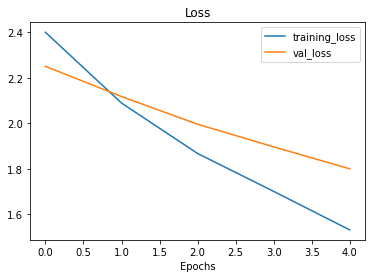

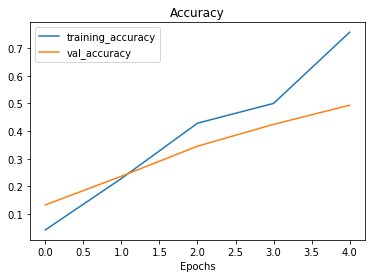

In [30]:
plot_loss_curves(history_1)

In [33]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 GAPT (GlobalAveragePooling2  (None, 1280)             0         
 D)                                                              
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [34]:
model_1.evaluate(test_data)

79/79 [==============================] - 6s 75ms/step - loss: 1.7875 - accuracy: 0.4980


[1.787475824356079, 0.49799999594688416]

### Model_2: 10% training data with augementation

In [21]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_dir_10_per = "10_food_classes_10_percent/train"
test_dir_10_per = "10_food_classes_10_percent/test"

train_data_2 = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_per,
                                                                   label_mode="categorical",
                                                                   image_size=IMG_SIZE,
                                                                   batch_size=BATCH_SIZE)

test_data_2 = tf.keras.preprocessing.image_dataset_from_directory(test_dir_10_per,
                                                                   label_mode="categorical",
                                                                   image_size=IMG_SIZE,
                                                                   batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [22]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomRotation(0.2)
], name="data_augmentation_layer")

In [25]:
base_model_2 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_2.trainable = False

inputs_10 = tf.keras.layers.Input(shape=(224,224,3), name="input_Layer")
x = data_augmentation(inputs_10)
x = base_model_2(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="GAPT_2")(x)
outputs_10 = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(inputs_10, outputs_10)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data_2,
                        epochs=5,
                        steps_per_epoch=len(train_data_2),
                        validation_data=test_data_2,
                        validation_steps=int(0.25 * len(test_data_2)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                   experiment_name="10PerDataAug")])

Saving TensorBoard log files to: transfer_learning/10PerDataAug/20221203-164540
Epoch 1/5
24/24 [==============================] - 27s 592ms/step - loss: 1.9685 - accuracy: 0.3880 - val_loss: 1.4190 - val_accuracy: 0.6891
Epoch 2/5
24/24 [==============================] - 10s 422ms/step - loss: 1.3165 - accuracy: 0.6960 - val_loss: 0.9719 - val_accuracy: 0.8191
Epoch 3/5
24/24 [==============================] - 10s 404ms/step - loss: 1.0006 - accuracy: 0.7667 - val_loss: 0.7703 - val_accuracy: 0.8454
Epoch 4/5
24/24 [==============================] - 11s 422ms/step - loss: 0.8283 - accuracy: 0.8013 - val_loss: 0.6681 - val_accuracy: 0.8438
Epoch 5/5
24/24 [==============================] - 10s 390ms/step - loss: 0.7596 - accuracy: 0.8040 - val_loss: 0.5858 - val_accuracy: 0.8635
